<a href="https://colab.research.google.com/github/thegoddysmart/Stock-Market-Prediction/blob/main/Stock_Market_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Collection

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Load Datasets

In [ ]:
# Load data for multiple companies
data_aapl = pd.read_csv('/content/AAPL.csv')
data_goog = pd.read_csv('/content/GOOG.csv')
data_msft = pd.read_csv('/content/MSFT.csv')

In [ ]:
print("Apple Dataset head; ")
print(data_aapl.head(5))

print("\nGoogle Dataset head; ")
print(data_goog.head(5))

print("\nMicrosoft Dataset head; ")
print(data_msft.head(5))

Apple Dataset head; 
         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.470742  493729600
1  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.481927  601904800
2  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.378824  552160000
3  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.367033  477131200
4  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.409362  447610800

Google Dataset head; 
         Date       Open       High        Low      Close  Adj Close  \
0  2010-01-04  15.615220  15.678981  15.547723  15.610239  15.592496   
1  2010-01-05  15.620949  15.637387  15.480475  15.541497  15.523831   
2  2010-01-06  15.588072  15.588072  15.102393  15.149715  15.132495   
3  2010-01-07  15.178109  15.193053  14.760922  14.797037  14.780218   
4  2010-01-08  14.744733  15.024933  14.672753  14.994298  14.977255   

      Volume  
0   78541293  
1  120638494  
2  159744526  
3  2575

In [ ]:
print("Apple Dataset tail; ")
print(data_aapl.tail(5))

print("\nGoogle Dataset tail; ")
print(data_goog.tail(5))

print("\nMicrosoft Dataset tail; ")
print(data_msft.tail(5))

Apple Dataset tail; 
            Date        Open        High         Low       Close   Adj Close  \
3267  2022-12-23  130.919998  132.419998  129.639999  131.860001  130.959961   
3268  2022-12-27  131.380005  131.410004  128.720001  130.029999  129.142441   
3269  2022-12-28  129.669998  131.029999  125.870003  126.040001  125.179680   
3270  2022-12-29  127.989998  130.479996  127.730003  129.610001  128.725311   
3271  2022-12-30  128.410004  129.949997  127.430000  129.929993  129.043106   

        Volume  
3267  63814900  
3268  69007800  
3269  85438400  
3270  75703700  
3271  77034200  

Google Dataset tail; 
            Date       Open       High        Low      Close  Adj Close  \
3267  2022-12-23  87.620003  90.099998  87.620003  89.809998  89.707916   
3268  2022-12-27  89.309998  89.500000  87.535004  87.930000  87.830055   
3269  2022-12-28  87.500000  88.519997  86.370003  86.459999  86.361725   
3270  2022-12-29  87.029999  89.364998  86.989998  88.949997  88.848892  

## Data Cleaning

In [ ]:
# Check for missing values
print("Missing values summary in Apple Dataset:")
print(data_aapl.isnull().sum())

print("\nMissing values summary in Google Dataset:")
print(data_goog.isnull().sum())

print("\nMissing values summary in Microsoft Dataset:")
print(data_msft.isnull().sum())

Missing values summary in Apple Dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values summary in Google Dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values summary in Microsoft Dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Exploratory Data Analysis

In [ ]:
# Display descriptive statistics
print("Apple Dataset statistics:")
print(data_aapl.describe())

print("\nGoogle Dataset statistics:")
print(data_goog.describe())

print("\nMicrosoft Dataset statistics:")
print(data_msft.describe())

Apple Dataset statistics:
              Open         High          Low        Close    Adj Close  \
count  3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
mean     51.297746    51.869747    50.731996    51.321186    49.132052   
std      47.328490    47.938843    46.732224    47.357062    47.497545   
min       6.870357     7.000000     6.794643     6.858929     5.806766   
25%      18.966697    19.121697    18.780178    18.967590    16.512823   
50%      29.756251    29.981250    29.561250    29.814999    27.199447   
75%      56.983748    57.309998    56.469999    56.777499    54.578368   
max     182.630005   182.940002   179.119995   182.009995   179.724564   

             Volume  
count  3.272000e+03  
mean   2.562707e+08  
std    2.225648e+08  
min    3.519590e+07  
25%    1.023541e+08  
50%    1.666698e+08  
75%    3.456643e+08  
max    1.880998e+09  

Google Dataset statistics:
              Open         High          Low        Close    Adj Close  \
count  

## Data Preprocessing

In [ ]:
# Let's define a function to help preprocess our various data
def preprocess_data(df):
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    # Sort by Date
    df.sort_values('Date', inplace=True)
    # Set Date as index
    df.set_index('Date', inplace=True)
    return df

# Preprocess data for each company
data_aapl = preprocess_data(data_aapl)
data_goog = preprocess_data(data_goog)
data_msft = preprocess_data(data_msft)

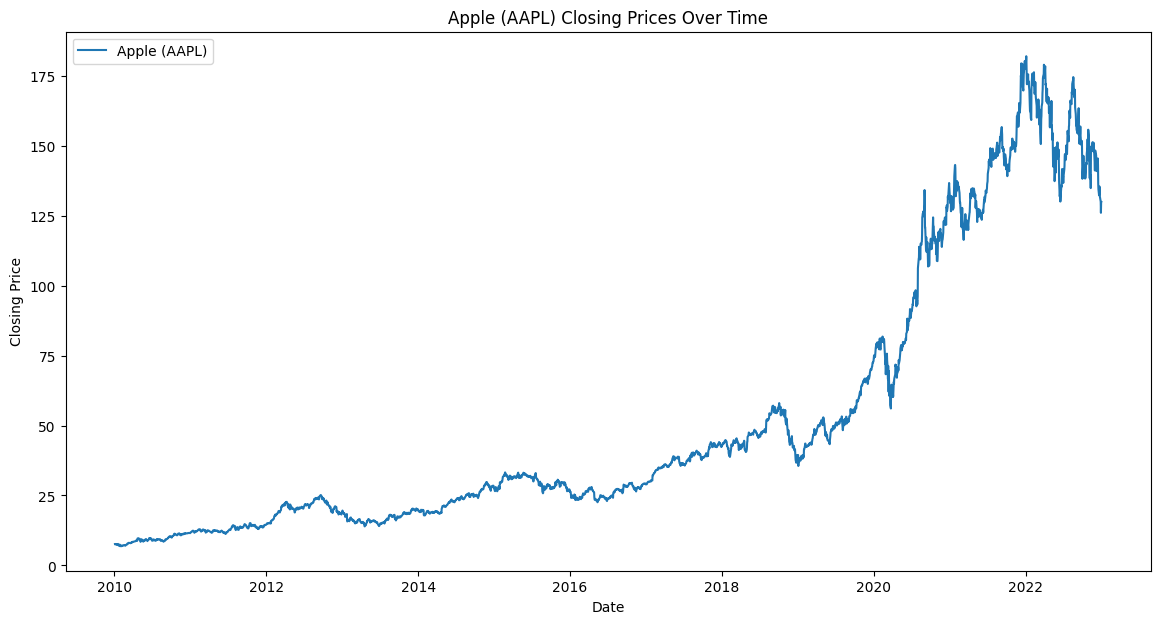

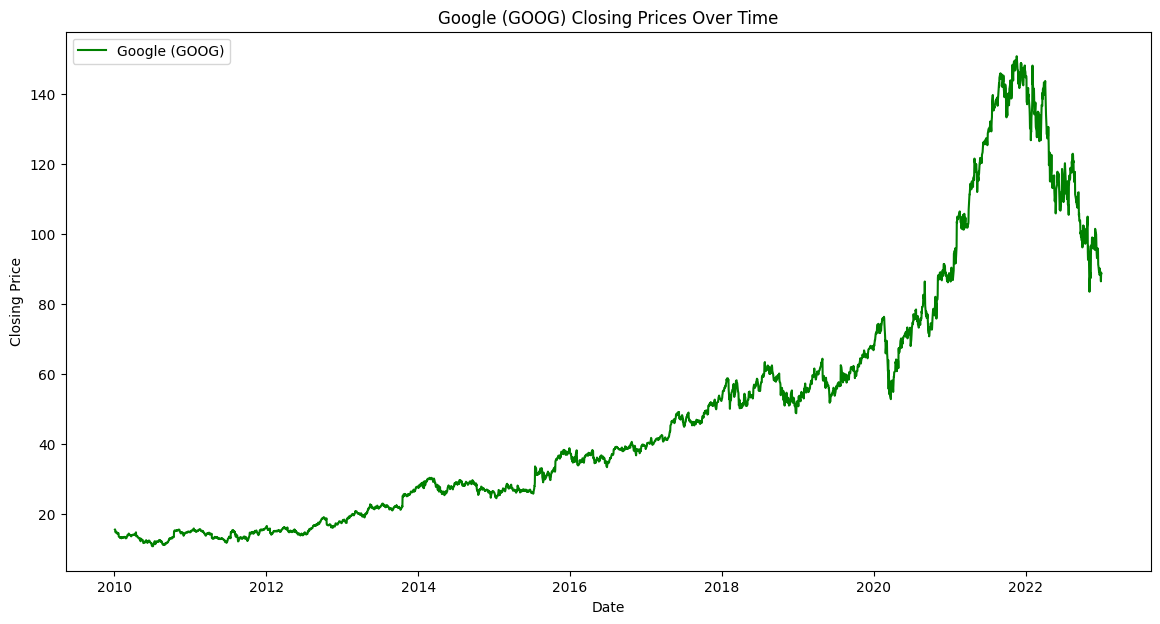

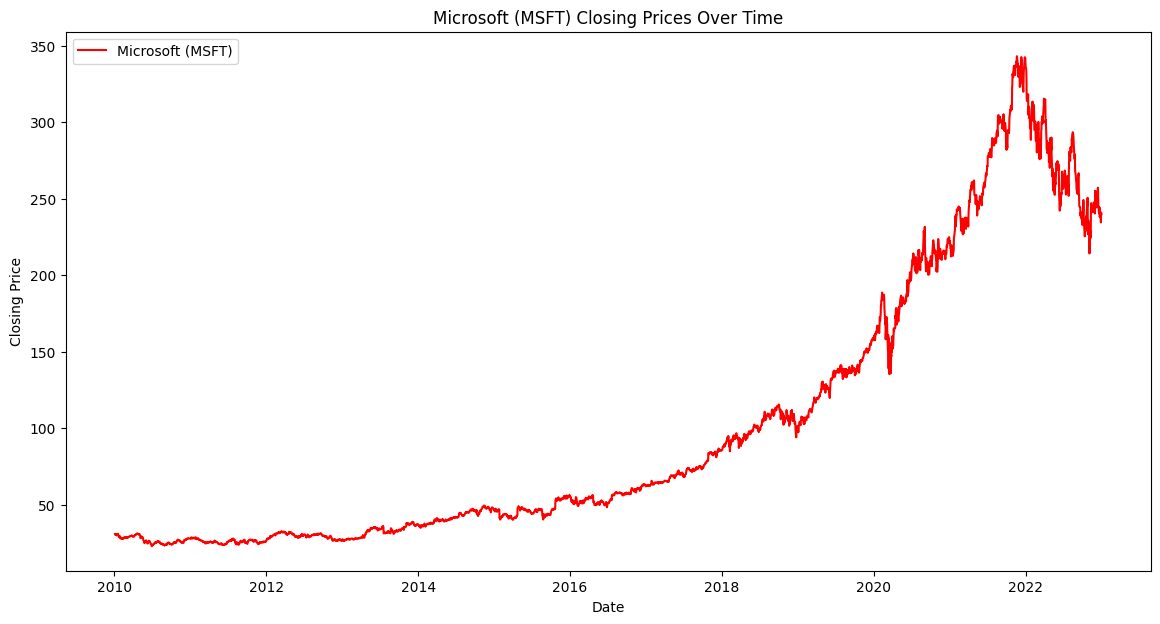

In [ ]:
# Plotting the closing prices for Apple
plt.figure(figsize=(14, 7))
plt.plot(data_aapl.index, data_aapl['Close'], label='Apple (AAPL)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Apple (AAPL) Closing Prices Over Time')
plt.legend()
plt.show()

# Plotting the closing prices for Google
plt.figure(figsize=(14, 7))
plt.plot(data_goog.index, data_goog['Close'], label='Google (GOOG)', color='g')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Google (GOOG) Closing Prices Over Time')
plt.legend()
plt.show()

# Plotting the closing prices for Microsoft
plt.figure(figsize=(14, 7))
plt.plot(data_msft.index, data_msft['Close'], label='Microsoft (MSFT)', color='r')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Microsoft (MSFT) Closing Prices Over Time')
plt.legend()
plt.show()


### Combined Dataset

In [ ]:
# Reset index for each DataFrame
data_aapl.reset_index(inplace=True)
data_goog.reset_index(inplace=True)
data_msft.reset_index(inplace=True)

# We are renaming columns in data_msft to avoid conflict
data_msft = data_msft.rename(columns={'Open': 'Open_MSFT', 'High': 'High_MSFT', 'Low': 'Low_MSFT',
                                      'Close': 'Close_MSFT', 'Adj Close': 'Adj Close_MSFT',
                                      'Volume': 'Volume_MSFT'})

# Merging all our data into a single DataFrame
combined_data = pd.merge(data_aapl, data_goog, on='Date', suffixes=('_AAPL', '_GOOG'))
combined_data = pd.merge(combined_data, data_msft, on='Date')

# Set 'Date' column as index again
combined_data.set_index('Date', inplace=True)

# Display the first few rows to verify
print(combined_data.head())


            Open_AAPL  High_AAPL  Low_AAPL  Close_AAPL  Adj Close_AAPL  \
Date                                                                     
2010-01-04   7.622500   7.660714  7.585000    7.643214        6.470742   
2010-01-05   7.664286   7.699643  7.616071    7.656429        6.481927   
2010-01-06   7.656429   7.686786  7.526786    7.534643        6.378824   
2010-01-07   7.562500   7.571429  7.466071    7.520714        6.367033   
2010-01-08   7.510714   7.571429  7.466429    7.570714        6.409362   

            Volume_AAPL  Open_GOOG  High_GOOG   Low_GOOG  Close_GOOG  \
Date                                                                   
2010-01-04    493729600  15.615220  15.678981  15.547723   15.610239   
2010-01-05    601904800  15.620949  15.637387  15.480475   15.541497   
2010-01-06    552160000  15.588072  15.588072  15.102393   15.149715   
2010-01-07    477131200  15.178109  15.193053  14.760922   14.797037   
2010-01-08    447610800  14.744733  15.024933  14

### Further Visualization for Combined Dataset

Missing values summary:
Open_AAPL         0
High_AAPL         0
Low_AAPL          0
Close_AAPL        0
Adj Close_AAPL    0
Volume_AAPL       0
Open_GOOG         0
High_GOOG         0
Low_GOOG          0
Close_GOOG        0
Adj Close_GOOG    0
Volume_GOOG       0
Open_MSFT         0
High_MSFT         0
Low_MSFT          0
Close_MSFT        0
Adj Close_MSFT    0
Volume_MSFT       0
dtype: int64
Statistics summary:
         Open_AAPL    High_AAPL     Low_AAPL   Close_AAPL  Adj Close_AAPL  \
count  3272.000000  3272.000000  3272.000000  3272.000000     3272.000000   
mean     51.297746    51.869747    50.731996    51.321186       49.132052   
std      47.328490    47.938843    46.732224    47.357062       47.497545   
min       6.870357     7.000000     6.794643     6.858929        5.806766   
25%      18.966697    19.121697    18.780178    18.967590       16.512823   
50%      29.756251    29.981250    29.561250    29.814999       27.199447   
75%      56.983748    57.309998    56.469999

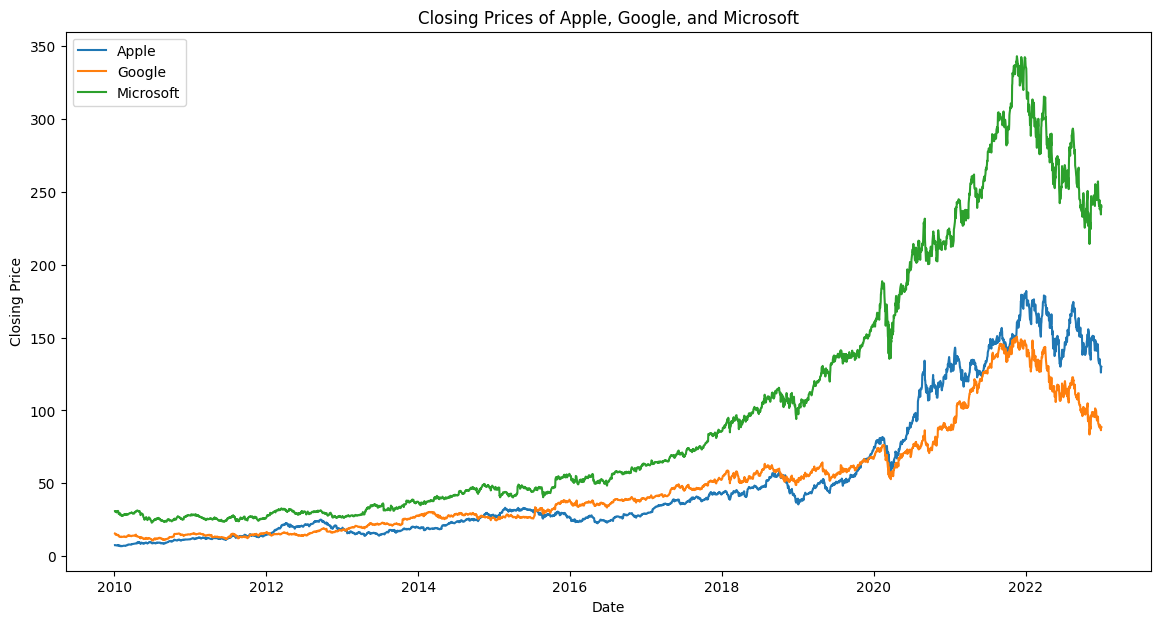

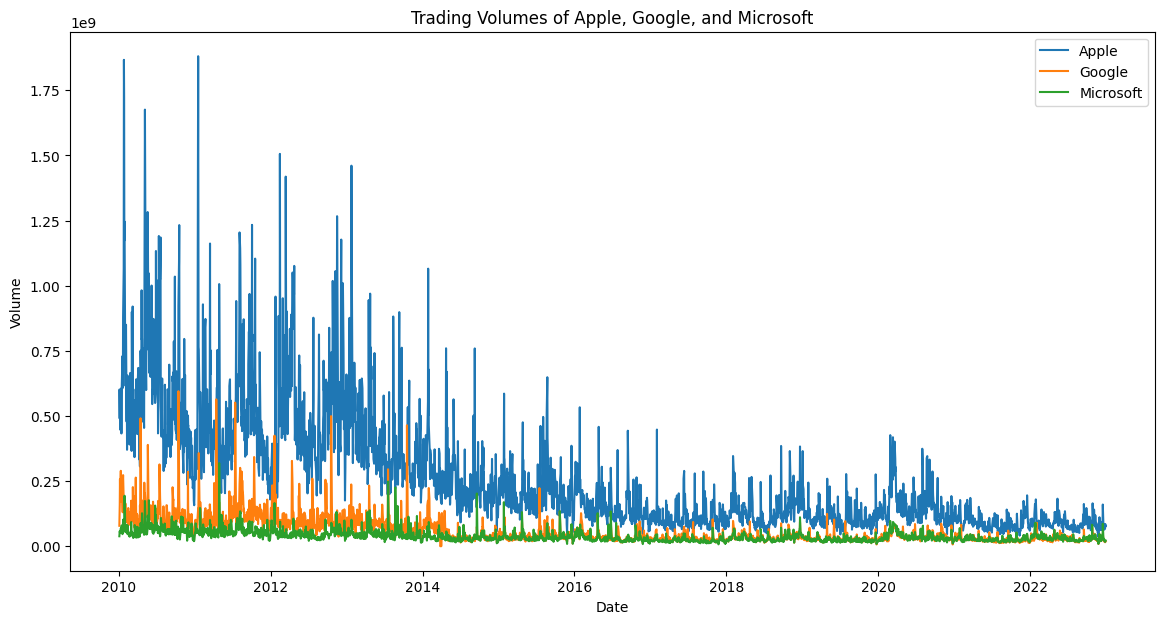

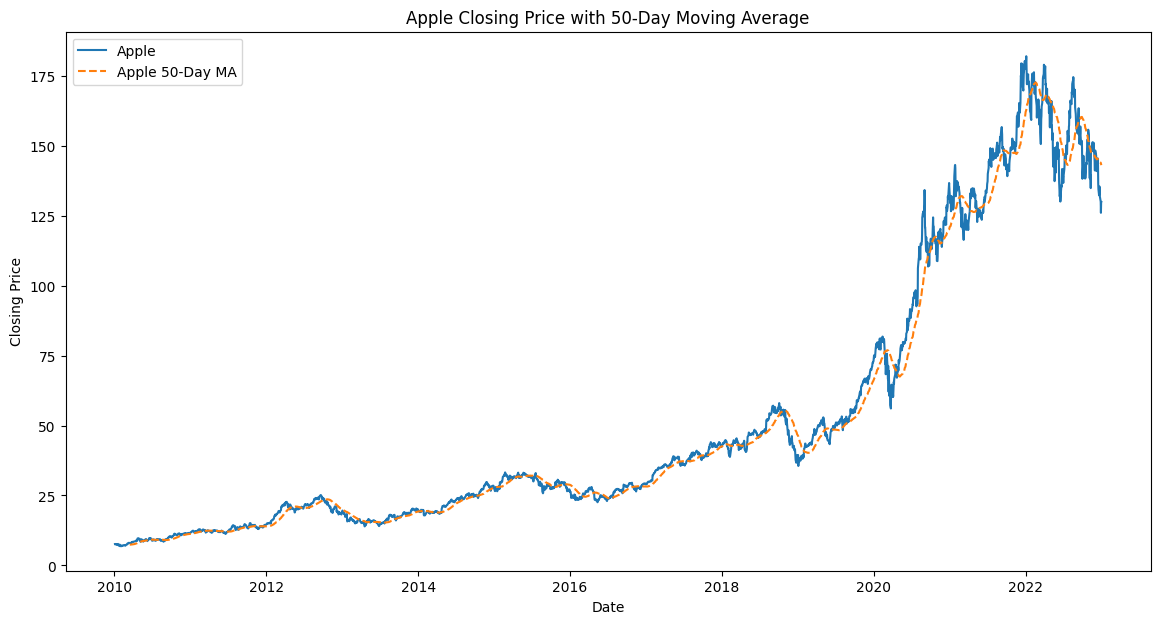

In [ ]:
# Check for missing values
print("Missing values summary:")
print(combined_data.isnull().sum())

# Display descriptive statistics
print("Statistics summary:")
print(combined_data.describe())

# Plotting closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['Close_AAPL'], label='Apple')
plt.plot(combined_data.index, combined_data['Close_GOOG'], label='Google')
plt.plot(combined_data.index, combined_data['Close_MSFT'], label='Microsoft')
plt.title('Closing Prices of Apple, Google, and Microsoft')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Plotting trading volumes
plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['Volume_AAPL'], label='Apple')
plt.plot(combined_data.index, combined_data['Volume_GOOG'], label='Google')
plt.plot(combined_data.index, combined_data['Volume_MSFT'], label='Microsoft')
plt.title('Trading Volumes of Apple, Google, and Microsoft')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Calculating and plotting 50-day moving average for closing prices
ma_window = 50
for company, label in [('Apple', 'Close_AAPL'), ('Google', 'Close_GOOG'), ('Microsoft', 'Close_MSFT')]:
    combined_data[f'{label}_MA'] = combined_data[label].rolling(window=ma_window).mean()

plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['Close_AAPL'], label='Apple')
plt.plot(combined_data.index, combined_data['Close_AAPL_MA'], linestyle='--', label='Apple 50-Day MA')
plt.title('Apple Closing Price with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


## Scaling

In [ ]:
# Assuming 'combined_data' is your DataFrame and 'columns_to_scale' are the features to be scaled
from sklearn.preprocessing import MinMaxScaler

# Define columns to scale
columns_to_scale = ['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Close_AAPL', 'Adj Close_AAPL', 'Volume_AAPL',
                    'Open_GOOG', 'High_GOOG', 'Low_GOOG', 'Close_GOOG', 'Adj Close_GOOG', 'Volume_GOOG',
                    'Open_MSFT', 'High_MSFT', 'Low_MSFT', 'Close_MSFT', 'Adj Close_MSFT', 'Volume_MSFT']

# Split the data into train and test before scaling
train_size = int(len(combined_data) * 0.8)
train_data = combined_data.iloc[:train_size]
test_data = combined_data.iloc[train_size:]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler only on the training data
scaler.fit(train_data[columns_to_scale])

# Transform both the training and test data
scaled_train_data = scaler.transform(train_data[columns_to_scale])
scaled_test_data = scaler.transform(test_data[columns_to_scale])

# Convert scaled data back to DataFrame for easier handling
scaled_train_df = pd.DataFrame(scaled_train_data, columns=columns_to_scale, index=train_data.index)
scaled_test_df = pd.DataFrame(scaled_test_data, columns=columns_to_scale, index=test_data.index)

# Print the first few rows to verify
print(scaled_train_df.head())
print(scaled_test_df.head())


            Open_AAPL  High_AAPL  Low_AAPL  Close_AAPL  Adj Close_AAPL  \
Date                                                                     
2010-01-04   0.010121   0.008814  0.010674    0.010465        0.008976   
2010-01-05   0.010683   0.009333  0.011094    0.010642        0.009127   
2010-01-06   0.010578   0.009162  0.009888    0.009017        0.007733   
2010-01-07   0.009314   0.007623  0.009068    0.008831        0.007574   
2010-01-08   0.008617   0.007623  0.009073    0.009498        0.008146   

            Volume_AAPL  Open_GOOG  High_GOOG  Low_GOOG  Close_GOOG  \
Date                                                                  
2010-01-04     0.244222   0.071910   0.071098  0.072736    0.072536   
2010-01-05     0.303155   0.071998   0.070464  0.071706    0.071486   
2010-01-06     0.276055   0.071495   0.069712  0.065913    0.065502   
2010-01-07     0.235179   0.065220   0.063689  0.060681    0.060116   
2010-01-08     0.219097   0.058587   0.061126  0.059330

## Splitting Data into Training and Test Sets

In [ ]:
# Split data into features (X) and target (y)
X = scaled_train_df.drop(['Close_AAPL', 'Close_GOOG', 'Close_MSFT'], axis=1)  # Use other columns as features
y_aapl = scaled_train_df['Close_AAPL']  # Target for Apple
y_goog = scaled_train_df['Close_GOOG']  # Target for Google
y_msft = scaled_train_df['Close_MSFT']  # Target for Microsoft

# Splitting into training and testing sets
X_train, X_test, y_train_aapl, y_test_aapl = train_test_split(X, y_aapl, test_size=0.2, shuffle=False)
_, _, y_train_goog, y_test_goog = train_test_split(X, y_goog, test_size=0.2, shuffle=False)
_, _, y_train_msft, y_test_msft = train_test_split(X, y_msft, test_size=0.2, shuffle=False)



In [ ]:
print(X_train)
print(X_test)

            Open_AAPL  High_AAPL  Low_AAPL  Adj Close_AAPL  Volume_AAPL  \
Date                                                                      
2010-01-04   0.010121   0.008814  0.010674        0.008976     0.244222   
2010-01-05   0.010683   0.009333  0.011094        0.009127     0.303155   
2010-01-06   0.010578   0.009162  0.009888        0.007733     0.276055   
2010-01-07   0.009314   0.007623  0.009068        0.007574     0.235179   
2010-01-08   0.008617   0.007623  0.009073        0.008146     0.219097   
...               ...        ...       ...             ...          ...   
2018-04-20   0.481462   0.477639  0.466795        0.452594     0.117957   
2018-04-23   0.468779   0.463298  0.462271        0.451056     0.054814   
2018-04-24   0.464877   0.461331  0.452581        0.443685     0.048661   
2018-04-25   0.454616   0.458296  0.456598        0.445960     0.037090   
2018-04-26   0.459662   0.459330  0.459840        0.447787     0.036177   

            Open_GOOG  H

In [ ]:
# Combine X_train and X_test for all companies
X_train_combined = pd.concat([X_train, X_test], axis=0)

# Combine targets into a single DataFrame for training and testing
y_train = pd.DataFrame({
    'Close_AAPL': y_train_aapl,
    'Close_GOOG': y_train_goog,
    'Close_MSFT': y_train_msft
})

y_test = pd.DataFrame({
    'Close_AAPL': y_test_aapl,
    'Close_GOOG': y_test_goog,
    'Close_MSFT': y_test_msft
})

# Print shapes to verify
print("Shapes for combined X_train and X_test:")
print(X_train_combined.shape, y_train.shape, X_test.shape, y_test.shape)


Shapes for combined X_train and X_test:
(2617, 15) (2093, 3) (524, 15) (524, 3)


In [ ]:
# Print shapes to verify
print("Shapes for combined X_train and X_test:")
print(X_train_combined.shape, y_train.shape, X_test.shape, y_test.shape)

print("Shapes for training and testing sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes for combined X_train and X_test:
(2617, 15) (2093, 3) (524, 15) (524, 3)
Shapes for training and testing sets:
X_train: (2093, 15)
X_test: (524, 15)
y_train: (2093, 3)
y_test: (524, 3)


### Creating a Time Series Sequences

In [ ]:
# Function to create time series sequences for features and targets
def create_time_series_sequences(X_data, y_data, time_step):
    X_seq, y_seq = [], []
    for i in range(len(X_data) - time_step):
        X_seq.append(X_data[i:(i + time_step), :])
        y_seq.append(y_data[i + time_step, :])  # y_data is aligned with the end of the sequence
    return np.array(X_seq), np.array(y_seq)

# Define the time step for sequences
time_step = 100

# Create time series sequences separately for training and testing data
X_train_seq, y_train_seq = create_time_series_sequences(X_train.values, y_train.values, time_step)
X_test_seq, y_test_seq = create_time_series_sequences(X_test.values, y_test.values, time_step)

# Print shapes to verify
print("Shapes for LSTM sequences:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)


Shapes for LSTM sequences:
X_train_seq: (1993, 100, 15)
y_train_seq: (1993, 3)
X_test_seq: (424, 100, 15)
y_test_seq: (424, 3)


In [ ]:
print("Shape of X_train_seq:", X_train_seq.shape)
print("Shape of X_test_seq:", X_test_seq.shape)


Shape of X_train_seq: (1993, 100, 15)
Shape of X_test_seq: (424, 100, 15)


In [ ]:
# Reshape input to be [samples, time steps, features]
X_train_seq = X_train_seq.reshape(X_train_seq.shape[0], X_train_seq.shape[1], 15)
X_test_seq = X_test_seq.reshape(X_test_seq.shape[0], X_test_seq.shape[1], 15)

# Print shapes to verify
print("Shapes after reshaping for LSTM:")
print(X_train_seq.shape, X_test_seq.shape)


Shapes after reshaping for LSTM:
(1993, 100, 15) (424, 100, 15)


## Building and Training Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
print(time_step)

100


In [ ]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 15)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=3))

In [ ]:
# Compling the LSTM Model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           13200     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                                 
Total params: 53753 (209.97 KB)
Trainable params: 53753 (209.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# print("Shape of X_train_seq:", X_train_seq.shape)
# print("Shape of y_train_combined:", y_train_combined.shape)

In [ ]:
# Train the LSTM model
# history = model.fit(X_train_seq, y_train_combined, epochs=100, batch_size=64, verbose=1)

# Train the LSTM model
epochs = 100  # Number of epochs
batch_size = 32  # Batch size

history = model.fit(X_train_seq, y_train_seq,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test_seq, y_test_seq),
                    verbose=1)


Epoch 1/100
63/63 [==============================] - 19s 194ms/step - loss: 0.0036 - accuracy: 0.8098 - val_loss: 0.0195 - val_accuracy: 0.7642
Epoch 2/100
63/63 [==============================] - 9s 145ms/step - loss: 3.0341e-04 - accuracy: 0.9478 - val_loss: 0.0146 - val_accuracy: 0.8184
Epoch 3/100
63/63 [==============================] - 11s 171ms/step - loss: 3.0638e-04 - accuracy: 0.9574 - val_loss: 0.0150 - val_accuracy: 0.7571
Epoch 4/100
63/63 [==============================] - 11s 172ms/step - loss: 2.7000e-04 - accuracy: 0.9639 - val_loss: 0.0119 - val_accuracy: 0.7500
Epoch 5/100
63/63 [==============================] - 10s 165ms/step - loss: 2.2596e-04 - accuracy: 0.9689 - val_loss: 0.0114 - val_accuracy: 0.7925
Epoch 6/100
63/63 [==============================] - 9s 149ms/step - loss: 2.2285e-04 - accuracy: 0.9744 - val_loss: 0.0124 - val_accuracy: 0.7618
Epoch 7/100
63/63 [==============================] - 13s 200ms/step - loss: 2.4556e-04 - accuracy: 0.9739 - val_loss: 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_seq, y_test_seq, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")



14/14 [==============================] - 1s 39ms/step - loss: 0.0086 - accuracy: 0.7429
Test Loss: 0.008615678176283836
Test Accuracy: 0.7429245114326477


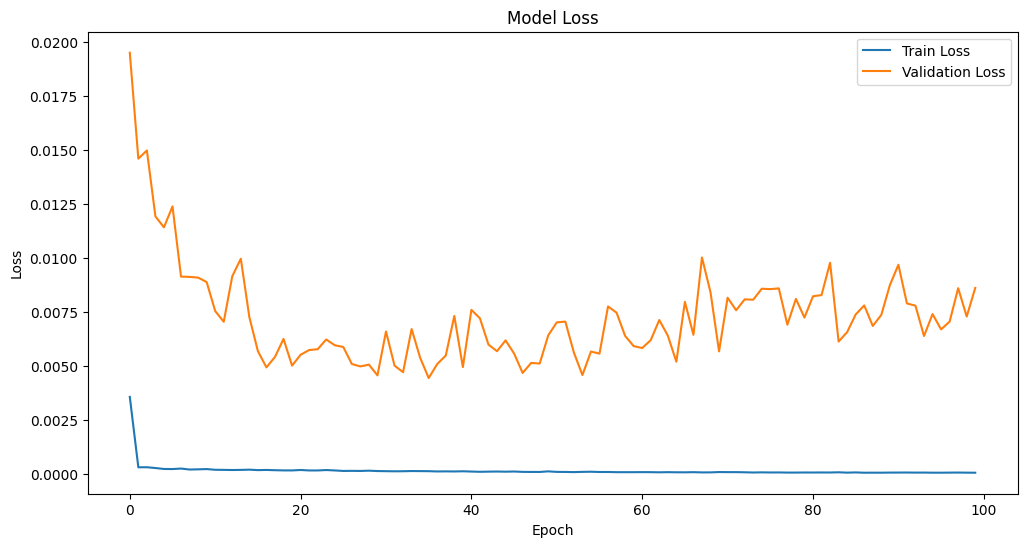

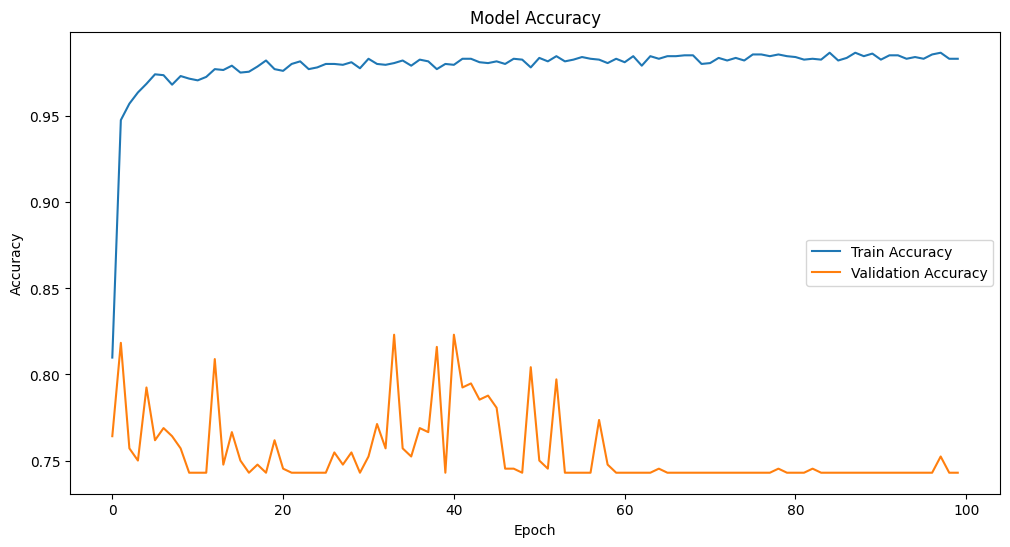

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Making Predictions

In [ ]:
# Predicting on the test set
y_pred = model.predict(X_test_seq)

14/14 [==============================] - 2s 39ms/step


In [ ]:
# Assuming y_pred are your scaled predictions
# Inverse transform the predictions back to the original scale

# Let's say you're predicting the closing prices only
y_pred_scaled = model.predict(X_test_seq)

# Extract the column indices of the closing prices in your scaled data
close_aapl_index = columns_to_scale.index('Close_AAPL')
close_goog_index = columns_to_scale.index('Close_GOOG')
close_msft_index = columns_to_scale.index('Close_MSFT')

# Create a new DataFrame with only the columns you want to inverse transform
y_pred_scaled_df = pd.DataFrame(y_pred_scaled, columns=['Close_AAPL', 'Close_GOOG', 'Close_MSFT'])

# Initialize a DataFrame to store the inverse transformed predictions
y_pred_inverse = pd.DataFrame(index=y_pred_scaled_df.index)

# Inverse transform each target separately
y_pred_inverse['Close_AAPL'] = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred_scaled_df), len(columns_to_scale) - 1)),
                    y_pred_scaled_df[['Close_AAPL']]], axis=1))[:, close_aapl_index]

y_pred_inverse['Close_GOOG'] = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred_scaled_df), len(columns_to_scale) - 1)),
                    y_pred_scaled_df[['Close_GOOG']]], axis=1))[:, close_goog_index]

y_pred_inverse['Close_MSFT'] = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred_scaled_df), len(columns_to_scale) - 1)),
                    y_pred_scaled_df[['Close_MSFT']]], axis=1))[:, close_msft_index]

# Print the inverse transformed predictions to verify
print(y_pred_inverse.head())


14/14 [==============================] - 1s 43ms/step
   Close_AAPL  Close_GOOG  Close_MSFT
0    6.858929    10.86104       23.01
1    6.858929    10.86104       23.01
2    6.858929    10.86104       23.01
3    6.858929    10.86104       23.01
4    6.858929    10.86104       23.01


In [ ]:
# Evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R2): {r2}')

# Evaluate on test set
evaluate_model(y_test_seq, y_pred)


Mean Absolute Error (MAE): 0.062138596133837175
Mean Squared Error (MSE): 0.008615677883308201
Root Mean Squared Error (RMSE): 0.0928206759472705
R-squared (R2): 0.6285890734268962


# Testing With Unseen Data

In [ ]:
data_aapl_23 = pd.read_csv('/content/AAPL_23.csv')
data_goog_23 = pd.read_csv('/content/GOOG_23.csv')
data_msft_23 = pd.read_csv('/content/MSFT_23.csv')

# Preprocess data for each company
data_aapl_23 = preprocess_data(data_aapl_23)
data_goog_23 = preprocess_data(data_goog_23)
data_msft_23 = preprocess_data(data_msft_23)

# Reset index for each DataFrame
data_aapl_23.reset_index(inplace=True)
data_goog_23.reset_index(inplace=True)
data_msft_23.reset_index(inplace=True)

# We are renaming columns in data_msft to avoid conflict
data_msft_23 = data_msft_23.rename(columns={'Open': 'Open_MSFT', 'High': 'High_MSFT', 'Low': 'Low_MSFT',
                                      'Close': 'Close_MSFT', 'Adj Close': 'Adj Close_MSFT',
                                      'Volume': 'Volume_MSFT'})

# Merging all our data into a single DataFrame
combined_data_23 = pd.merge(data_aapl_23, data_goog_23, on='Date', suffixes=('_AAPL', '_GOOG'))
combined_data_23 = pd.merge(combined_data_23, data_msft_23, on='Date')

# Set 'Date' column as index again
combined_data_23.set_index('Date', inplace=True)

# Display the first few rows to verify
print(combined_data_23.head())


             Open_AAPL   High_AAPL    Low_AAPL  Close_AAPL  Adj Close_AAPL  \
Date                                                                         
2023-01-03  130.279999  130.899994  124.169998  125.070000      124.216301   
2023-01-04  126.889999  128.660004  125.080002  126.360001      125.497498   
2023-01-05  127.129997  127.769997  124.760002  125.019997      124.166634   
2023-01-06  126.010002  130.289993  124.889999  129.619995      128.735229   
2023-01-09  130.470001  133.410004  129.889999  130.149994      129.261627   

            Volume_AAPL  Open_GOOG  High_GOOG   Low_GOOG  Close_GOOG  \
Date                                                                   
2023-01-03    112117500  89.830002  91.550003  89.019997   89.699997   
2023-01-04     89113600  91.010002  91.239998  87.800003   88.709999   
2023-01-05     80962700  88.070000  88.209999  86.559998   86.769997   
2023-01-06     87754700  87.360001  88.470001  85.570000   88.160004   
2023-01-09     707908

In [ ]:
# Scale the unseen data using the same scaler instance
scaled_combined_data_23 = scaler.transform(combined_data_23[columns_to_scale])

# Create time series sequences for the unseen data
X_unseen_seq, _ = create_time_series_sequences(scaled_combined_data_23, np.zeros((len(scaled_combined_data_23), 3)), time_step)

# Reshape input to be [samples, time steps, features]
X_unseen_seq = X_unseen_seq.reshape(X_unseen_seq.shape[0], X_unseen_seq.shape[1], len(columns_to_scale) - 3)

# Predict on the unseen data
y_pred_unseen_scaled = model.predict(X_unseen_seq)

# Inverse transform the predictions back to the original scale
y_pred_unseen_inverse = pd.DataFrame(index=combined_data_23.index)
y_pred_unseen_inverse['Close_AAPL'] = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred_unseen_scaled), len(columns_to_scale) - 1)),
                    y_pred_unseen_scaled[:, 0][:, None]], axis=1))[:, close_aapl_index]

y_pred_unseen_inverse['Close_GOOG'] = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred_unseen_scaled), len(columns_to_scale) - 1)),
                    y_pred_unseen_scaled[:, 1][:, None]], axis=1))[:, close_goog_index]

y_pred_unseen_inverse['Close_MSFT'] = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred_unseen_scaled), len(columns_to_scale) - 1)),
                    y_pred_unseen_scaled[:, 2][:, None]], axis=1))[:, close_msft_index]

# Evaluate performance metrics on the unseen data
mae_unseen = mean_absolute_error(combined_data_23['Close_AAPL'], y_pred_unseen_inverse['Close_AAPL'])
mse_unseen = mean_squared_error(combined_data_23['Close_AAPL'], y_pred_unseen_inverse['Close_AAPL'])
rmse_unseen = np.sqrt(mse_unseen)
r2_unseen = r2_score(combined_data_23['Close_AAPL'], y_pred_unseen_inverse['Close_AAPL'])

print(f"Mean Absolute Error (MAE) on unseen data (AAPL): {mae_unseen}")
print(f"Mean Squared Error (MSE) on unseen data (AAPL): {mse_unseen}")
print(f"Root Mean Squared Error (RMSE) on unseen data (AAPL): {rmse_unseen}")
print(f"R-squared (R2) on unseen data (AAPL): {r2_unseen}")

# Visualize predictions vs. actual closing prices
plt.figure(figsize=(14, 7))
plt.plot(combined_data_23.index, combined_data_23['Close_AAPL'], label='Actual Closing Price (AAPL)')
plt.plot(combined_data_23.index, y_pred_unseen_inverse['Close_AAPL'], label='Predicted Closing Price (AAPL)')
plt.title('Actual vs. Predicted Closing Prices on Unseen Data (AAPL)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


ValueError: cannot reshape array of size 270000 into shape (150,100,15)

In [ ]:
# Initialize the scaler with the same parameters
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data columns (already done earlier)
scaler.fit(train_data[columns_to_scale])

# Transform the 2023 data
scaled_data_23 = scaler.transform(combined_data_23[columns_to_scale])

# Convert scaled data back to DataFrame for easier handling
scaled_data_23_df = pd.DataFrame(scaled_data_23, columns=columns_to_scale, index=combined_data_23.index)

# Print the first few rows to verify
print(scaled_data_23_df.head())


            Open_AAPL  High_AAPL  Low_AAPL  Close_AAPL  Adj Close_AAPL  \
Date                                                                     
2023-01-03   1.660637   1.652826  1.585235    1.577387        1.600718   
2023-01-04   1.615020   1.622945  1.597526    1.594600        1.618038   
2023-01-05   1.618250   1.611072  1.593204    1.576720        1.600047   
2023-01-06   1.603179   1.644689  1.594959    1.638101        1.661807   
2023-01-09   1.663194   1.686310  1.662488    1.645173        1.668923   

            Volume_AAPL  Open_GOOG  High_GOOG  Low_GOOG  Close_GOOG  \
Date                                                                  
2023-01-03     0.036321   1.207793   1.227852  1.198407    1.204136   
2023-01-04     0.023789   1.225853   1.223125  1.179716    1.189015   
2023-01-05     0.019348   1.180856   1.176929  1.160718    1.159385   
2023-01-06     0.023049   1.169989   1.180893  1.145550    1.180615   
2023-01-09     0.013807   1.198074   1.216874  1.191666

In [ ]:
# Function to create time series sequences (already defined earlier)
def create_time_series_sequences(X_data, time_step):
    X_seq = []
    for i in range(len(X_data) - time_step):
        X_seq.append(X_data[i:(i + time_step), :])
    return np.array(X_seq)

# Define the time step for sequences (same as used in training)
time_step = 100

# Create time series sequences for the 2023 data
X_data_23_seq = create_time_series_sequences(scaled_data_23_df.values, time_step)

# Reshape input to be [samples, time steps, features]
X_data_23_seq = X_data_23_seq.reshape(X_data_23_seq.shape[0], time_step, num_features)

# Print shapes to verify
print("Shapes for 2023 LSTM sequences:")
print(X_data_23_seq.shape)



Shapes for 2023 LSTM sequences:
(150, 100, 18)


In [ ]:
# Drop the target features from the sequences (e.g., Close_AAPL, Close_GOOG, Close_MSFT)
# Assuming 'Close_AAPL', 'Close_GOOG', and 'Close_MSFT' are at the indices 3, 8, and 13 respectively
target_indices = [columns_to_scale.index('Close_AAPL'), columns_to_scale.index('Close_GOOG'), columns_to_scale.index('Close_MSFT')]
X_data_23_seq_dropped = np.delete(X_data_23_seq, target_indices, axis=2)

# Print shapes to verify
print("Shapes for 2023 LSTM sequences after dropping targets:")
print(X_data_23_seq_dropped.shape)


Shapes for 2023 LSTM sequences after dropping targets:
(150, 100, 15)


In [ ]:
# Check the input shape of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           13200     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                                 
Total params: 53753 (209.97 KB)
Trainable params: 53753 (209.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Number of features in the training data
num_features = train_data[columns_to_scale].shape[1]

# Ensure the 2023 data has the same number of features
assert scaled_data_23_df.shape[1] == num_features, "Mismatch in number of features!"


In [ ]:


# Predicting on the 2023 data
y_pred_23 = model.predict(X_data_23_seq_dropped)

# Print the predictions to verify
print(y_pred_23[:5])


5/5 [==============================] - 0s 44ms/step
[[1.2230575  1.3074689  0.8902853 ]
 [1.2294385  1.303253   0.8908888 ]
 [1.2434005  1.2972349  0.8906382 ]
 [1.2475541  1.2844903  0.88892   ]
 [1.2548263  1.287723   0.88918835]]


In [ ]:
# Create a new DataFrame with only the columns you want to inverse transform
y_pred_23_df = pd.DataFrame(y_pred_23, columns=['Close_AAPL', 'Close_GOOG', 'Close_MSFT'])

# Initialize a DataFrame to store the inverse transformed predictions
y_pred_23_inverse = pd.DataFrame(index=y_pred_23_df.index)

# Inverse transform each target separately
y_pred_23_inverse['Close_AAPL'] = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred_23_df), len(columns_to_scale) - 1)),
                    y_pred_23_df[['Close_AAPL']]], axis=1))[:, close_aapl_index]

y_pred_23_inverse['Close_GOOG'] = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred_23_df), len(columns_to_scale) - 1)),
                    y_pred_23_df[['Close_GOOG']]], axis=1))[:, close_goog_index]

y_pred_23_inverse['Close_MSFT'] = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred_23_df), len(columns_to_scale) - 1)),
                    y_pred_23_df[['Close_MSFT']]], axis=1))[:, close_msft_index]

# Print the inverse transformed predictions to verify
print(y_pred_23_inverse.head())


   Close_AAPL  Close_GOOG  Close_MSFT
0    6.858929    10.86104       23.01
1    6.858929    10.86104       23.01
2    6.858929    10.86104       23.01
3    6.858929    10.86104       23.01
4    6.858929    10.86104       23.01


Mean Absolute Error (MAE): 205.41936645777778
Mean Squared Error (MSE): 49314.57395526409
Root Mean Squared Error (RMSE): 222.068849583331
R-squared (R2): -363.42718922928316


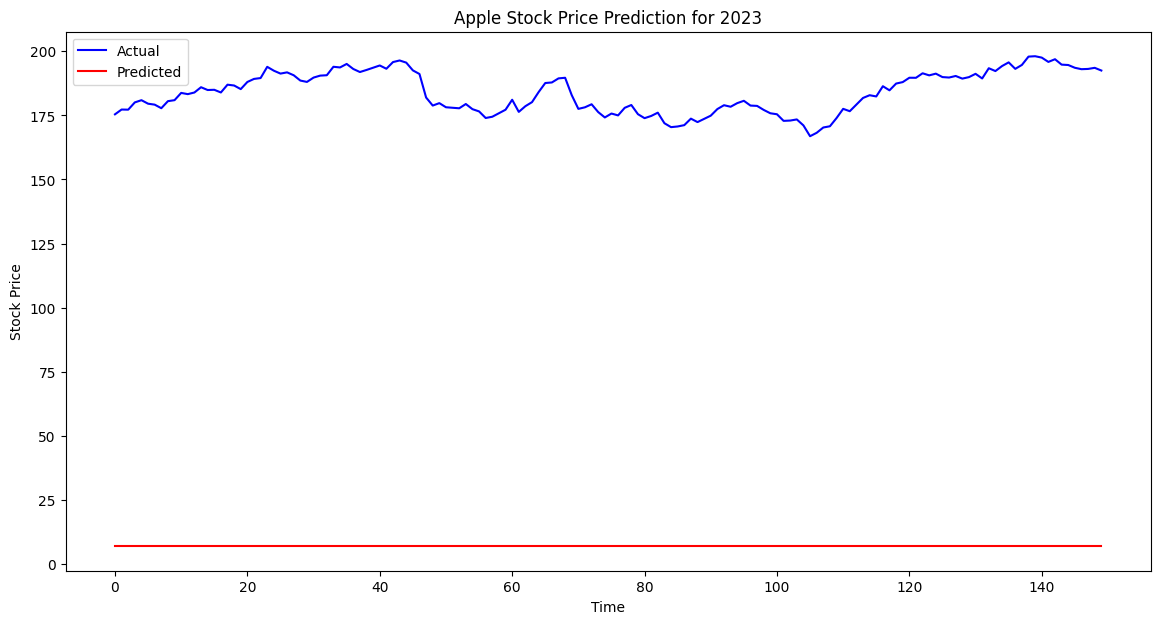

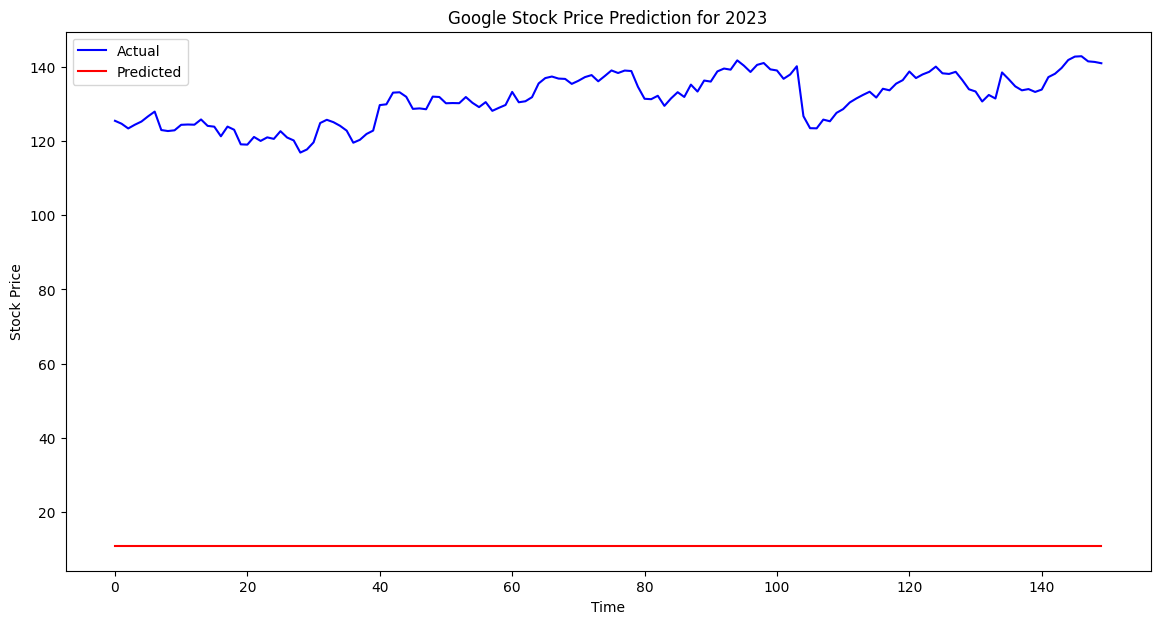

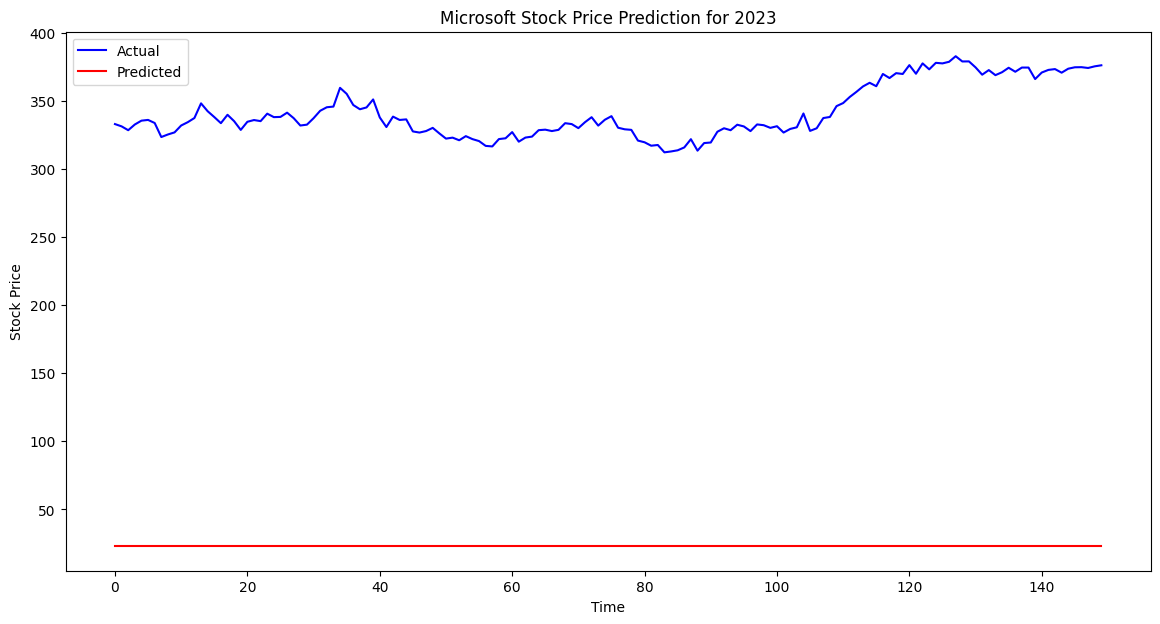

In [ ]:
# Extract the actual closing prices for 2023 data
actual_close_23 = combined_data_23[['Close_AAPL', 'Close_GOOG', 'Close_MSFT']].iloc[time_step:].reset_index(drop=True)

# Evaluate model performance
evaluate_model(actual_close_23.values, y_pred_23_inverse.values)

# Plotting the predictions vs actual values
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(14, 7))
    plt.plot(y_true, color='blue', label='Actual')
    plt.plot(y_pred, color='red', label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

plot_predictions(actual_close_23['Close_AAPL'], y_pred_23_inverse['Close_AAPL'], 'Apple Stock Price Prediction for 2023')
plot_predictions(actual_close_23['Close_GOOG'], y_pred_23_inverse['Close_GOOG'], 'Google Stock Price Prediction for 2023')
plot_predictions(actual_close_23['Close_MSFT'], y_pred_23_inverse['Close_MSFT'], 'Microsoft Stock Price Prediction for 2023')
